# Simple Linear Regression

In this notebook, we'll build a linear regression model to predict `Sales` using an appropriate predictor variable.

# Summary of Steps

- Reading and understanding the data
    - Understand the structure of the data
    - df.shape, df.info, df.describe()
- Visualizing the data
    - Plot pair plots against the target variable. 
        - sns.pairplot(df, x_vars = [ ], y_vars=[ ], kind = 'scatter' size=4, aspect=1)
    - Plot correlation matrix to compare the correlation coefficents
        - corrl_columns = df[ [ ] ]
        - correlation_matrix = corrl_columns.corr()
        - sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
- Perform simple linear regression
    - Assign the feature variable
    - Add a constant to get an intercept
        - X_train_sm = sm.add_constant(X_train)
    - Fit the resgression line using 'OLS'
        - lr = sm.OLS(y_train, X_train_sm).fit()
    - Print the parameters, i.e. the intercept and the slope of the regression line fitted
        - lr.params
    - Perform a summary operation lists out all the different parameters of the regression line fitted
        - print(lr.summary())
- Residual Analysis
    - check error term is normally distributed or not. 
	    - Both qualitative and quantitative(out of scope)
	    - plot a histogram to figure out whether the mean is 0 and the distribution is normal or not. 
    - check any pattern exist for the errors 
	    - Homoskedastic
- Predictions on the Test Set
    - List of actions
        - make prediciton on the test set (y_test_pred)
        - evaluate the model, r-squared, on the test
- Decision
    - compare the r_squared values from the train and test split. 
    - Anything with in 5% range indicates stability and it shows that the model is stable and working in the test set.

Follow the same steps for SKLearn library


## Step 1: Reading and Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [182]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [183]:
# Import the numpy and pandas package

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression 

In [184]:
# Read the given CSV file, and view some sample records

advertising = pd.read_csv("advertising.csv")
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Let's inspect the various aspects of our dataframe

In [185]:
advertising.shape

(200, 4)

In [186]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [187]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Step 2: Visualising the Data

Let's now visualise our data using seaborn. We'll first make a pairplot of all the variables present to visualise which variables are most correlated to `Sales`.

In [188]:
import matplotlib.pyplot as plt 
import seaborn as sns

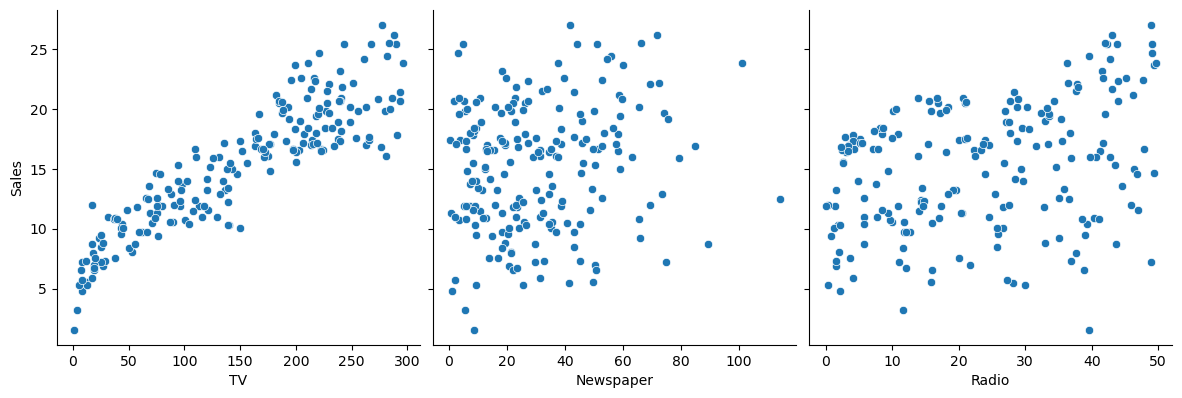

In [189]:
sns.pairplot(advertising, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales',size=4, aspect=1, kind='scatter')
plt.show()

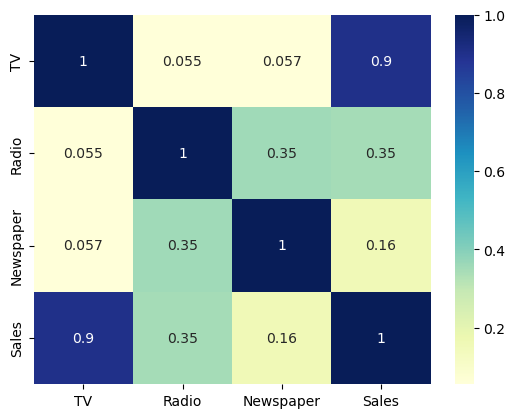

In [190]:
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot = True)
plt.show()

As is visible from the pairplot and the heatmap, the variable `TV` seems to be most correlated with `Sales`. So let's go ahead and perform simple linear regression using `TV` as our feature variable.

---
## Step 3: Performing Simple Linear Regression

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times TV$

The $m$ values are called the model **coefficients** or **model parameters**.

---

### Generic Steps in model building using `statsmodels`

We first assign the feature variable, `TV`, in this case, to the variable `X` and the response variable, `Sales`, to the variable `y`.

In [191]:
X = advertising['TV']
y = advertising['Sales']

#### Train-Test Split

You now need to split our variable into training and testing sets. You'll perform this by importing `train_test_split` from the `sklearn.model_selection` library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset

In [192]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [193]:
# Let's now take a look at the train dataset

X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [194]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

#### Building a Linear Model

You first need to import the `statsmodel.api` library using which you'll perform the linear regression.

In [195]:
import statsmodels.api as sm

By default, the `statsmodels` library fits a line on the dataset which passes through the origin. But in order to have an intercept, you need to manually use the `add_constant` attribute of `statsmodels`. And once you've added the constant to your `X_train` dataset, you can go ahead and fit a regression line using the `OLS` (Ordinary Least Squares) attribute of `statsmodels` as shown below

In [196]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [197]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [198]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sun, 29 Oct 2023   Prob (F-statistic):           1.52e-52
Time:                        00:45:21   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

## Added from the lecture

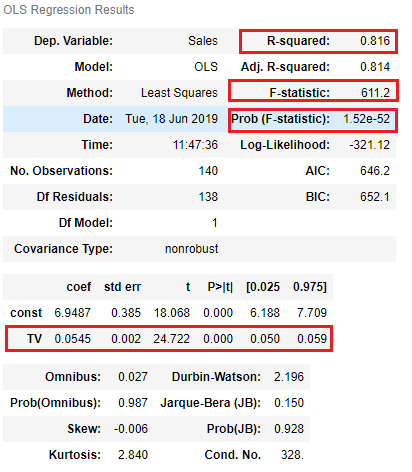




####  Looking at some key statistics from the summary

The values we are concerned with are - 
1. The coefficients and significance (p-values)
2. R-squared
3. F statistic and its significance

##### 1. The coefficient for TV is 0.054, with a very low p value
The coefficient is statistically significant. So the association is not purely by chance. 

##### 2. R - squared is 0.816
Meaning that 81.6% of the variance in `Sales` is explained by `TV`

This is a decent R-squared value.

###### 3. F statistic has a very low p value (practically low)
Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

# Concepts

- F-statistic

We were introduced to a new term named F-statistic and Prob(F-statistic). Now, recall that in the last segment, you did a hypothesis test for beta to determine whether or not the coefficient 
β
1
 outputted by the model was significant or not. Now, F-statistic is similar in the sense that now instead of testing the significance of each of the betas, it tells you whether the overall model fit is significant or not. This parameter is examined because many a time it happens that even though all of your betas are significant, but your overall model fit might happen just by chance.

The heuristic is similar to what you learnt in the normal p-value calculation as well. If the 'Prob (F-statistic)' is less than 0.05, you can conclude that the overall model fit is significant. If it is greater than 0.05, you might need to review your model as the fit might be by chance, i.e. the line may have just luckily fit the data. In the image above, you can see that the p-value of the F-statistic is 1.52e-52  which is practically a zero value. This means that the model for which this was calculated is definitely significant since it is less than 0.05.

This will be more appreciable when you study multiple linear regression since there you have a lot of betas for the different predictor variables and thus it is very helpful in determining if all the predictor variables together as a whole are significant or not or simply put, it tells you whether the model fit as a whole is significant or not. 

- R-squared

Like you studied earlier as well, R-squared value tells you exactly how much variance in the data has been explained by the model. In our case, the R-squared is about 0.816 which means that the model is able to explain 81.6% of the variance which is pretty good.

 

- Coefficients and p-values:

The p-values of the coefficients (in this case just one coefficient for TV) tell you whether the coefficient is significant or not. In this case, the coefficient of TV came out to be 0.0545 with a standard error of about 0.002. Thus, you got a t-value of 24.722 which lead to a practically zero p-value. Hence, you can say that your coefficient is indeed significant. 

 

Apart from this, the summary statistics outputs a few more metrics which are not of any use as of now. But you'll learn about some more of them in multiple linear regression.

---
The fit is significant. Let's visualize how well the model fit the data.

From the parameters that we get, our linear regression equation becomes:

$ Sales = 6.948 + 0.054 \times TV $

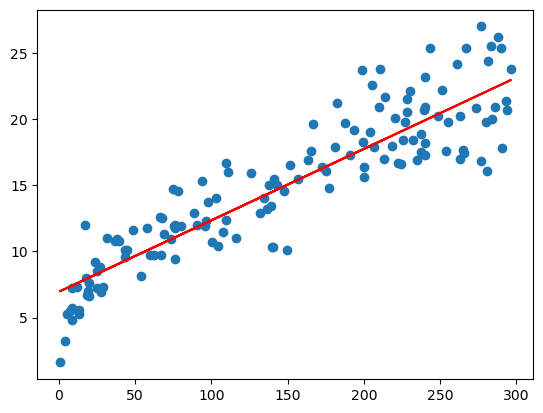

In [199]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

## Step 4: Residual analysis 
To validate assumptions of the model, and hence the reliability for inference

List of assumption in a linear regression

- **There is a *linear relationship* between X and Y**
    - • X and Y should display some sort of a linear relationship; otherwise, there is no use of fitting a linear model between them.
- **Error terms are *normally distributed* with mean zero(not X, Y):**
    - There is no problem if the error terms are not normally distributed if you just wish to fit a line and not make any further interpretations.
    - But if you are willing to make some inferences on the model that you have built (you will see this in the coming segments), you need to have a notion of the distribution of the error terms. One particular repercussion of the error terms not being normally distributed is that the p-values obtained during the hypothesis test to determine the significance of the coefficients become unreliable. (You'll see this in a later segment)
    - The assumption of normality is made, as it has been observed that the error terms generally follow a **normal distribution with mean equal to zero** in most cases.
- **Error terms are *independent* of each other:**
    - The error terms should not be dependent on one another (like in a time-series data wherein the next value is dependent on the previous one).
- **Error terms have *constant variance* (homoscedasticity):**
    - The variance should not increase (or decrease) as the error values change.
    - Also, the variance should not follow any pattern as the error terms change.

#### Distribution of the error terms
We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [200]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

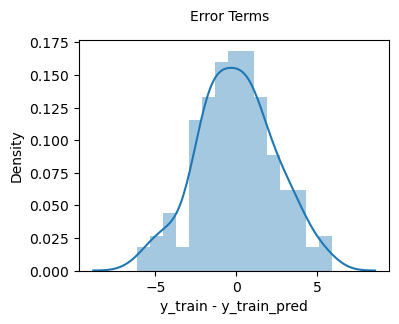

In [201]:
fig = plt.figure(figsize=(4, 3))
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 10)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 10)         # X-label
plt.show()

The residuals are following the normally distributed with a mean 0. All good!

#### Looking for patterns in the residuals

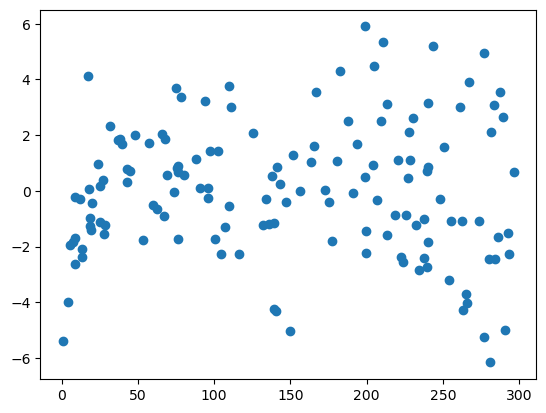

In [202]:
plt.scatter(X_train,res)
plt.show()

We are confident that the model fit isn't by chance, and has decent predictive power. The normality of residual terms allows some inference on the coefficients.

Although, the variance of residuals increasing with X indicates that there is significant variation that this model is unable to explain.

As you can see, the regression line is a pretty good fit to the data

## Step 5: Predictions on the Test Set

Now that you have fitted a regression line on your train dataset, it's time to make some predictions on the test data. For this, you first need to add a constant to the `X_test` data like you did for `X_train` and then you can simply go on and predict the y values corresponding to `X_test` using the `predict` attribute of the fitted regression line.

- List of actions
    - make prediciton on the test set (y_test_pred)
    - evaluate the model, r-squared, on the test. 


In [203]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [204]:
y_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [205]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

##### Looking at the RMSE

In [206]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

2.0192960089662337

###### Checking the R-squared on the test set

In [207]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.7921031601245656

In [208]:
r_squared = r2_score(y_train, y_train_pred)
r_squared

0.8157933136480389

## Observations and insights

- compare the r_squared values from the train and test split. 
- Anything with in 5% range indicates stability and it shows that the model is stable and working in the test set.

##### Visualizing the fit on the test set

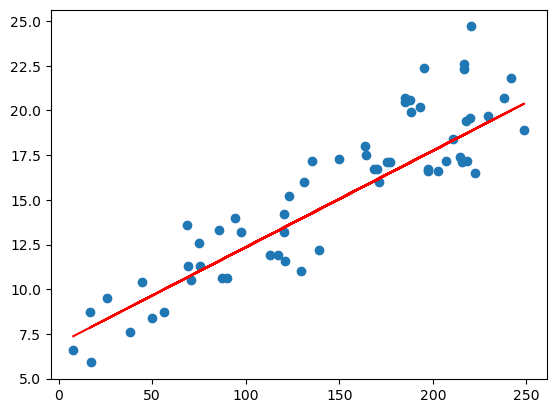

In [209]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()

 All the above we have done using the stats model. 

### Linear Regression using `linear_model` in `sklearn`

Apart from `statsmodels`, there is another package namely `sklearn` that can be used to perform linear regression. We will use the `linear_model` library from `sklearn` to build the model. Since, we hae already performed a train-test split, we don't need to do it again.

There's one small step that we need to add, though. When there's only a single feature, we need to add an additional column in order for the linear regression fit to be performed successfully.


Steps in sklearn model building
- crate an object of linear regression
- fit the model
- see the params, make predicitons (train, test)
- evaluate (r2, etc.)


In [210]:
from sklearn.model_selection import train_test_split
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [213]:
X_train_lm.shape

(140,)

In [215]:
# reshape to (n,1) since sklearn expect a 2d array

X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)

In [216]:
print(X_train_lm.shape)
print(y_train_lm.shape)
print(X_test_lm.shape)
print(y_test_lm.shape)

(140, 1)
(140,)
(60, 1)
(60,)


In [218]:
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
# create an object of linear regression
lm = LinearRegression()

# Fit the model using lr.fit()
lm.fit(X_train_lm, y_train_lm)

LinearRegression()

In [219]:
print(lm.intercept_)
print(lm.coef_)

6.94868320000136
[0.05454575]


The equationwe get is the same as what we got before!

$ Sales = 6.948 + 0.054* TV $

Sklearn linear model is useful as it is compatible with a lot of sklearn utilites (cross validation, grid search etc.)

In [220]:
# make predictions

y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)


In [222]:
# Evaluate the mode

print (r2_score(y_true=y_train_lm, y_pred = y_train_pred))
print (r2_score(y_true=y_test_lm, y_pred = y_test_pred))


0.8157933136480388
0.792103160124566


# Summary of the Section


In this session, you built a simple linear regression model in Python using the advertising dataset. You also saw some more theoretical aspects in between. Here's a brief of what you learnt in this session.

- A quick recap of simple linear regression
- Assumptions of simple linear regression
    - Linear relationship between X and y.
    - Normal distribution of error terms.
    - Independence of error terms.
    - Constant variance of error terms.
   
- 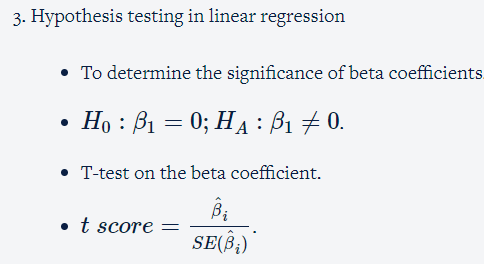

- Building a linear model
    - OLS (Ordinary Least Squares) method in statsmodels to fit a line.
    - Summary statistics
        - F-statistic, R-squared, coefficients and their p-values.
- Residual Analysis
    - Histogram of the error terms to check normality.
    - Plot of the error terms with X or y to check independence.
- Predictions
    - Making predictions on the test set using the 'predict()' function.
- Linear Regression using SKLearn
    - A second package apart from statsmodels for linear regression.
    - A more hassle-free package to just fit a line without any inferences.


---
## Some common questions on Simple Linear Regression
---

### Q: Why is it called 'R-squared'?

It is square of the correlation ( Pearson's R)

In [225]:
corrs = np.corrcoef(X_train, y_train)
print(corrs)

[[1.         0.90321277]
 [0.90321277 1.        ]]


In [224]:
corrs[0,1] ** 2

0.8157933136480386

Correlation (Pearson) is also called **"r"** or **"Pearson's R"**

### Q: What is a good RMSE? Is there some RMSE that I should aim for?

The RMSE:
 - depends on the units of the Y variables
 - is NOT a normalized measure
 
While it can't really tell you of the gooodness of the particular model, it can help you compare models. 
- A mode with a low RMSE is a better model but 

A better measure is R squared, which is normalized.